# Bài tập lớn: Phân tích biến động giá cổ phiếu
Môn học: Lập trình xử lý dữ liệu với Python.

Sinh viên: Trần Hoàng Nguyên.

# Chọn mã cổ phiếu
- Mã: AMZN
- Tên đầy đủ: Amazon.com, Inc.
- Sàn: Nasdaq (quốc tế)
- Dự liệu phân tích từ khoảng cuối tháng 5/2024 -> 5/2025 

In [19]:
!pip install yfinance
!pip install ta


Tất cả các thư viện cần để xử lí dữ liệu

In [20]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from ta.momentum import RSIIndicator
import warnings
warnings.filterwarnings('ignore')


# Thu thập dự liệu giá cổ phiếu

In [21]:
# symbol = "AMZN"
# df = yf.Ticker(symbol).history(period='1y').reset_index()
# # Lưu dữ liệu vào 1 file csv
# df.to_csv("AMZN_data.csv", index=False)

In [22]:
# Lấy dữ liệu từ file CSV
df = pd.read_csv("AMZN_data.csv")
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-05-31 04:00:00+00:00,178.300003,179.210007,173.869995,176.440002,58903900,0.0,0.0
1,2024-06-03 04:00:00+00:00,177.699997,178.699997,175.919998,178.339996,30786600,0.0,0.0
2,2024-06-04 04:00:00+00:00,177.639999,179.820007,176.440002,179.339996,27198400,0.0,0.0
3,2024-06-05 04:00:00+00:00,180.100006,181.500000,178.750000,181.279999,32116400,0.0,0.0
4,2024-06-06 04:00:00+00:00,181.750000,185.000000,181.490005,185.000000,31371200,0.0,0.0


In [23]:
df.info()
# ⇒ Dữ liệu chúng ta thu thập được sẽ có 250 ngày giao dịch và có 8 cột dữ liệu được kéo về từ Yahoo Finance


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          250 non-null    datetime64[ns, UTC]
 1   Open          250 non-null    float64            
 2   High          250 non-null    float64            
 3   Low           250 non-null    float64            
 4   Close         250 non-null    float64            
 5   Volume        250 non-null    int64              
 6   Dividends     250 non-null    float64            
 7   Stock Splits  250 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 15.8 KB


# Làm sạch và tiền xử lí

In [24]:
df # Dữ liệu thô

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-05-31 04:00:00+00:00,178.300003,179.210007,173.869995,176.440002,58903900,0.0,0.0
1,2024-06-03 04:00:00+00:00,177.699997,178.699997,175.919998,178.339996,30786600,0.0,0.0
2,2024-06-04 04:00:00+00:00,177.639999,179.820007,176.440002,179.339996,27198400,0.0,0.0
3,2024-06-05 04:00:00+00:00,180.100006,181.500000,178.750000,181.279999,32116400,0.0,0.0
4,2024-06-06 04:00:00+00:00,181.750000,185.000000,181.490005,185.000000,31371200,0.0,0.0
...,...,...,...,...,...,...,...,...
245,2025-05-23 04:00:00+00:00,198.899994,202.369995,197.850006,200.990005,33393500,0.0,0.0
246,2025-05-27 04:00:00+00:00,203.089996,206.690002,202.190002,206.020004,34892000,0.0,0.0
247,2025-05-28 04:00:00+00:00,205.919998,207.660004,204.410004,204.720001,28549800,0.0,0.0
248,2025-05-29 04:00:00+00:00,208.029999,208.809998,204.229996,205.699997,34650000,0.0,0.0


In [25]:
# Xoá 2 cột Dividends và Stock Splits có toàn bộ dữ klệu bằng 0.0
df.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

In [26]:
# Kiểm tra dữ liệu thiếu và loại bỏ hàng thiếu (nếu có)
print(df.isna().sum())
df.dropna(inplace=True)

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


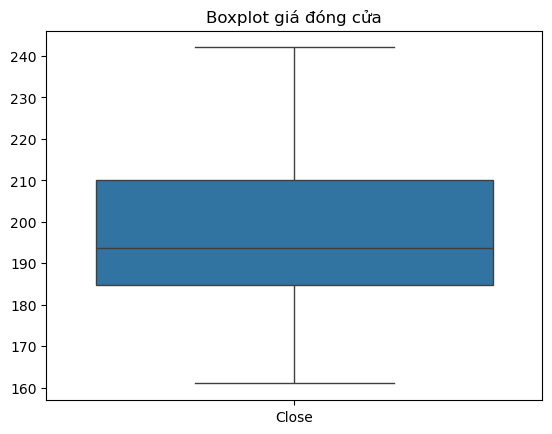

In [27]:
# Kiểm tra outliers bằng boxplot
sns.boxplot(data=df[['Close']])
plt.title("Boxplot giá đóng cửa")
plt.show()

=> Phân tích Boxplot của giá đóng cửa

Biểu đồ boxplot cho thấy phần lớn giá đóng cửa của cổ phiếu AMZN nằm trong khoảng 180–210 USD. Trung vị (median) khoảng 190–195 USD. Không có điểm nào bị coi là outlier, cho thấy dữ liệu giá khá ổn định và không có sai số bất thường lớn. Do đó, không cần xử lý ngoại lệ trước khi tính toán các chỉ số kỹ thuật.


In [28]:
df

,Date,Open,High,Low,Close,Volume
0,2024-05-31 04:00:00+00:00,178.300003,179.210007,173.869995,176.440002,58903900
1,2024-06-03 04:00:00+00:00,177.699997,178.699997,175.919998,178.339996,30786600
2,2024-06-04 04:00:00+00:00,177.639999,179.820007,176.440002,179.339996,27198400
3,2024-06-05 04:00:00+00:00,180.100006,181.500000,178.750000,181.279999,32116400
4,2024-06-06 04:00:00+00:00,181.750000,185.000000,181.490005,185.000000,31371200
...,...,...,...,...,...,...
245,2025-05-23 04:00:00+00:00,198.899994,202.369995,197.850006,200.990005,33393500
246,2025-05-27 04:00:00+00:00,203.089996,206.690002,202.190002,206.020004,34892000
247,2025-05-28 04:00:00+00:00,205.919998,207.660004,204.410004,204.720001,28549800
248,2025-05-29 04:00:00+00:00,208.029999,208.809998,204.229996,205.699997,34650000


# Tính các chỉ số kỹ thuật

In [29]:
# SMA
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['SMA50'] = df['Close'].rolling(window=50).mean()

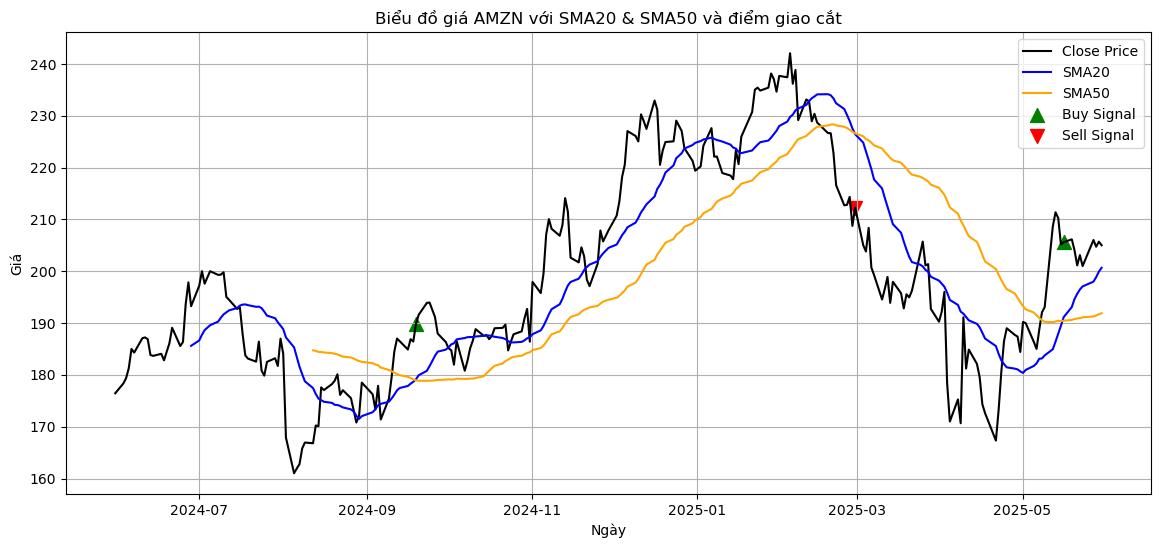

In [30]:
# Phân tích chỉ số SMA
# Tạo cột đánh dấu sự khác nhau giữa SMA20 và SMA50
df['Signal'] = 0
df['Signal'][df['SMA20'] > df['SMA50']] = 1
df['Signal'][df['SMA20'] < df['SMA50']] = -1

# Tìm các điểm giao cắt (nơi tín hiệu thay đổi)
df['Crossover'] = df['Signal'].diff()

# Các điểm giao cắt lên (SMA20 cắt lên SMA50)
buy_signals = df[df['Crossover'] == 2]

# Các điểm giao cắt xuống (SMA20 cắt xuống SMA50)
sell_signals = df[df['Crossover'] == -2]

# Vẽ
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Date', y='Close', label='Close Price', color='black')
sns.lineplot(data=df, x='Date', y='SMA20', label='SMA20', color='blue')
sns.lineplot(data=df, x='Date', y='SMA50', label='SMA50', color='orange')

# Vẽ dấu chấm tại điểm giao cắt lên (Buy)
plt.scatter(buy_signals['Date'], buy_signals['Close'], marker='^', color='green', s=100, label='Buy Signal')

# Vẽ dấu chấm tại điểm giao cắt xuống (Sell)
plt.scatter(sell_signals['Date'], sell_signals['Close'], marker='v', color='red', s=100, label='Sell Signal')

plt.title("Biểu đồ giá AMZN với SMA20 & SMA50 và điểm giao cắt")
plt.xlabel("Ngày")
plt.ylabel("Giá")
plt.legend()
plt.grid(True)
plt.show()


In [31]:
# EMA
df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()
df['EMA20']

0      176.440002
1      176.620954
2      176.879911
3      177.298967
4      178.032398
          ...    
245    198.212495
246    198.956068
247    199.505014
248    200.095012
249    200.563106
Name: EMA20, Length: 250, dtype: float64

In [32]:
# RSI
df['RSI'] = RSIIndicator(close=df['Close'], window=14).rsi()

# Phân tích dữ liệu

<Axes: title={'center': 'Volatility theo tháng'}, xlabel='Month'>

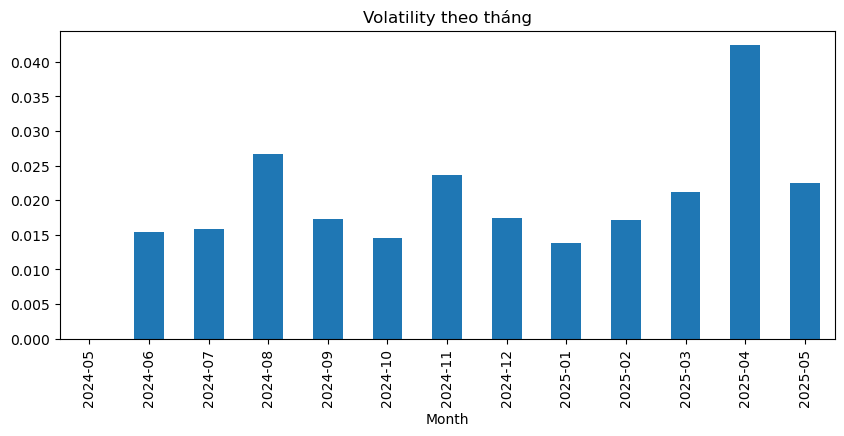

In [33]:
# Lợi suất ngày
df['Daily Return'] = df['Close'].pct_change()

# Volatility theo tháng
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
monthly_vol = df.groupby('Month')['Daily Return'].std()
monthly_vol.plot(kind='bar', figsize=(10,4), title='Volatility theo tháng')


# Trực quan hoá

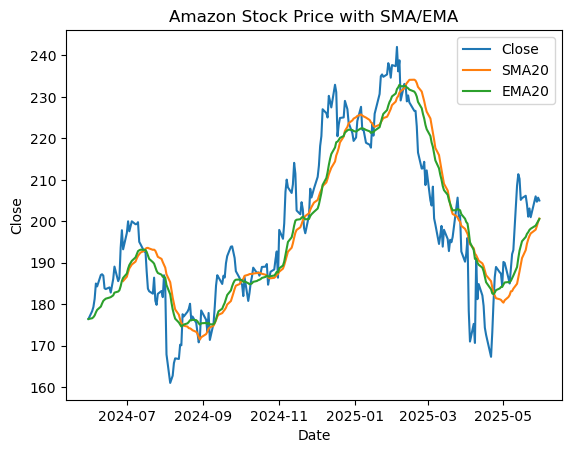

In [34]:
# Giá đóng cửa + SMA/EMA
sns.lineplot(data=df, x='Date', y='Close', label='Close')
sns.lineplot(data=df, x='Date', y='SMA20', label='SMA20')
sns.lineplot(data=df, x='Date', y='EMA20', label='EMA20')
plt.title("Amazon Stock Price with SMA/EMA")
plt.show()

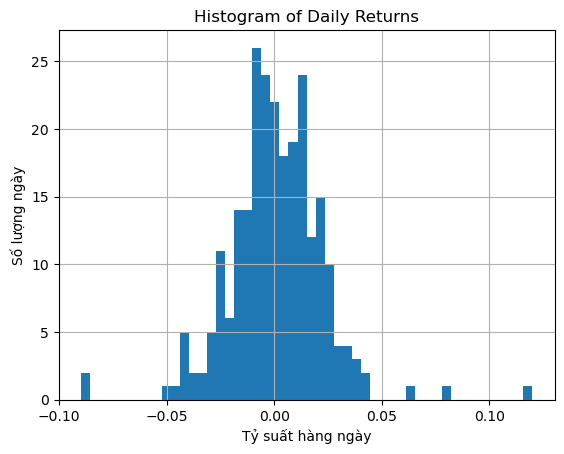

In [35]:
# Histogram lợi suất
df['Daily Return'] = df['Close'].pct_change()
df['Daily Return'].hist(bins=50)
plt.title("Histogram of Daily Returns")
plt.xlabel("Tỷ suất hàng ngày")
plt.ylabel("Số lượng ngày")
plt.show()

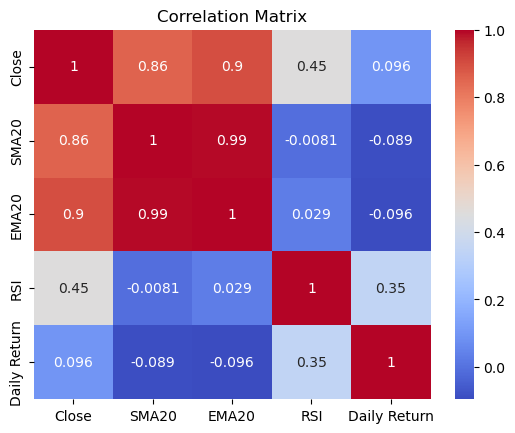

In [36]:
# Heatmap tương quan
corr = df[['Close', 'SMA20', 'EMA20', 'RSI', 'Daily Return']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
